In [3]:
import tensorflow as tf

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

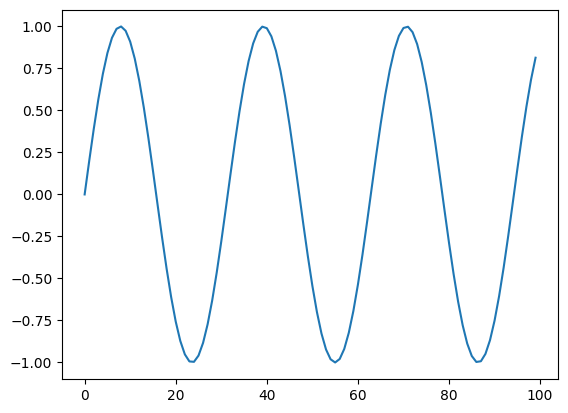

In [5]:
series = np.sin(0.2*np.arange(100))
plt.plot(series)
plt.show()

In [6]:
T = 10
D = 1
X =[]
Y = []

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(X.shape)

(90, 10, 1)


In [18]:
i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.SimpleRNN(5)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - loss: 0.0833 - val_loss: 0.0968
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0926 - val_loss: 0.0190
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0214 - val_loss: 0.0683
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0662 - val_loss: 0.0275
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0179 - val_loss: 0.0086
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0154 - val_loss: 0.0300
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0357 - val_loss: 0.0138
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0140 - val_loss: 0.0028
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0060 - val_loss: 0.0137
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0167 - val_loss: 0.0053
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0069 - val_loss: 0.0056


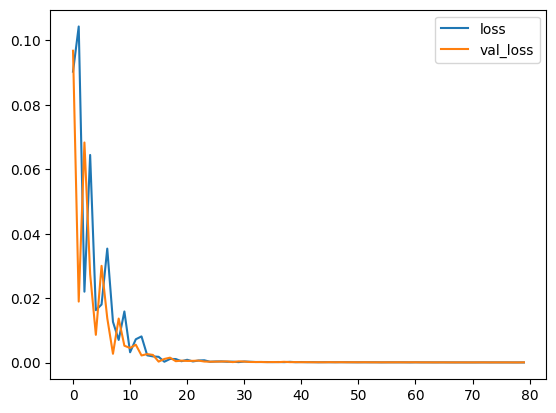

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [22]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1, 1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

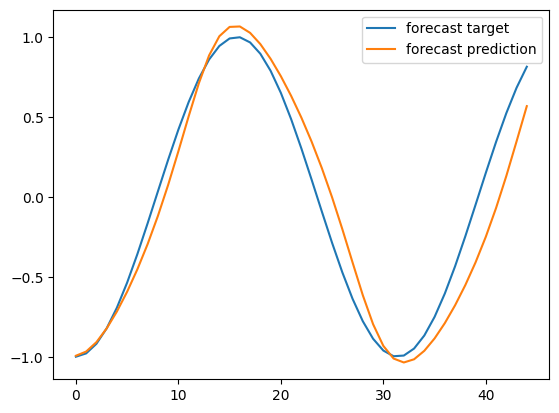

In [23]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()